In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from titanic_visualizations import survival_stats
titanic_data=pd.read_csv('titanic-data.csv')

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Checking if there are aany duplicates present in data.

In [61]:
titanic_data_duplicates = titanic_data.duplicated()
print ('Number of duplicate entries is/are {}'. format(titanic_data_duplicates.sum()))

Number of duplicate entries is/are 0



# Checking Null values in the given data as we can see above table some of the age, cabin values have null values present.


In [62]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Checking people whose age is missing from the titanic data table

In [63]:
missing_age=pd.isnull(titanic_data['Age'])
print (titanic_data[missing_age].head())

    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631   7.2250   NaN        C  
28      0      0  330959   7.8792   NaN        Q  


In [64]:
missing_age_female=titanic_data[missing_age]['Sex']=='female'
missing_age_male=titanic_data[missing_age]['Sex']=='male'
print ('Number of females and males missing age are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum()))

Number of females and males missing age are 53 and 124 respectively


As we can see in total 177 people are missing age details out of 891 people listed i.e., 19.86% of the total people have missing age details.

# Cleaning the data 

In [65]:
titanic_data_age_clean=titanic_data.dropna()
titanic_data_age_clean.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we have dropped the rows which have null values as they may interfere while visualizing the data.

In [66]:
#Checking the yougest and oldest person survived and yougest and oldest person dead
youngest_dead=titanic_data[titanic_data['Survived']==False]['Age'].min()
oldest_dead=titanic_data[titanic_data['Survived']==False]['Age'].max()
youngest_survived=titanic_data[titanic_data['Survived']==True]['Age'].min()
oldest_survived=titanic_data[titanic_data['Survived']==True]['Age'].max()
print(' Youngest to die is {}\n Youngest to survive is {}\n Oldest to die is {}\n Oldest to Survive is {}'
      .format(youngest_dead,youngest_survived,oldest_dead,oldest_survived))

 Youngest to die is 1.0
 Youngest to survive is 0.42
 Oldest to die is 74.0
 Oldest to Survive is 80.0


# Checking factor crucial for survival

In [67]:
Survived=titanic_data["Survived"]
Dead=titanic_data.drop('Survived',axis=1)
Dead.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# Finding the total number of survivers and non survivers and their average age.
number_survived = titanic_data_age_clean[titanic_data_age_clean['Survived'] == True]['Survived'].count()
number_dead = titanic_data_age_clean[titanic_data_age_clean['Survived'] == False]['Survived'].count()
age_survived = titanic_data_age_clean[titanic_data_age_clean['Survived'] == True]['Age']
age_died = titanic_data_age_clean[titanic_data_age_clean['Survived'] == False]['Age']
mean_age_survived=np.mean(age_survived)
mean_age_dead=np.mean(age_died)
print ('Total no. of survivors are {} \nTotal no. of non survivors are {} \nAverage age of survivors is {} \n\
Average age of non survivors is {}'.format(number_survived, number_dead, np.round(mean_age_survived), np.round(mean_age_died)))

Total no. of survivors are 123 
Total no. of non survivors are 60 
Average age of survivors is 33.0 
Average age of non survivors is 41.0


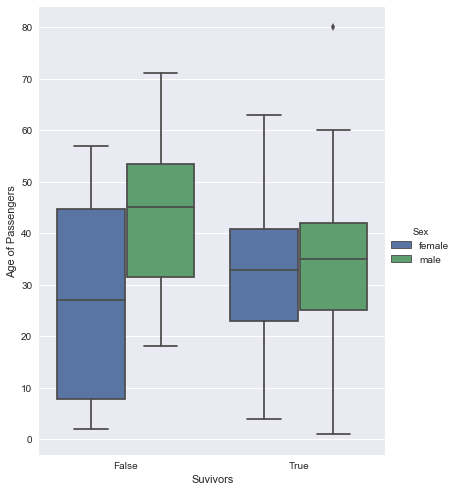

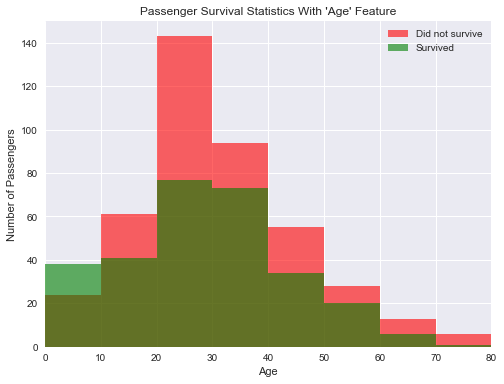

In [69]:
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_clean, kind="box", size=7, aspect=.8)
g.set_axis_labels('Suvivors', 'Age of Passengers').set_xticklabels(["False", "True"])
survival_stats(Dead,Survived,'Age')

In the above graphs we can observe that there is no much difference between the average survivor's age and average non survivor's age. so age is not the accurate factor to consider for drawing conclusions on survivals.

No. of male survived is 342
No. of male dead is 549
No. of Female survived are 342
No. of Female dead are 549


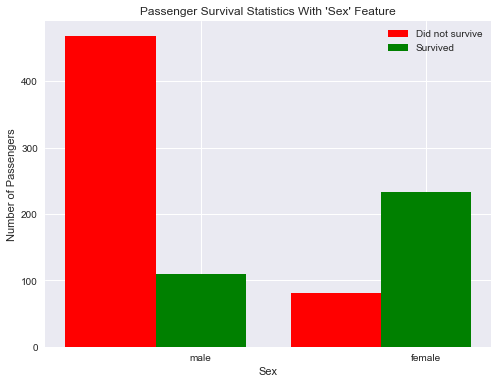

In [68]:
# checking if sex is a crucial factor in survival
Male_survived=titanic_data[titanic_data['Survived']==True]['Sex']=='male'
Female_survived=titanic_data[titanic_data['Survived']==True]['Sex']=='female'
Male_Dead=titanic_data[titanic_data['Survived']==False]['Sex']=='Male'
Female_Dead=titanic_data[titanic_data['Survived']==False]['Sex']=='female'

print("No. of male survived is {}\nNo. of male dead is {}\nNo. of Female survived are {}\nNo. of Female dead are {}"
      .format(Male_survived.count(),Male_Dead.count(),Female_survived.count(),Female_Dead.count()))
survival_stats(Dead,Survived,'Sex')

From the above plot we can see that the number of male who did not survive are very high compared to the females. From this we can think of a hypothesis that women are given priority to board the boats before men. 

# Checking If females with children has good chances of survival

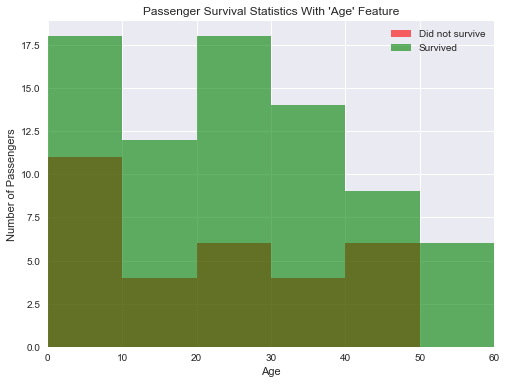

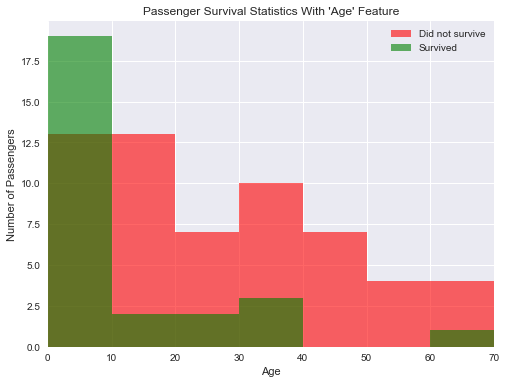

In [92]:
survival_stats(Dead, Survived, 'Age', ["Sex == 'female'", "Parch > 0"])
survival_stats(Dead, Survived, 'Age', ["Sex == 'male'", "Parch > 0"])

Considering below 10 years of age as children, we can observe from the above graphs that females with children has highest survival rate compared to males with children. 

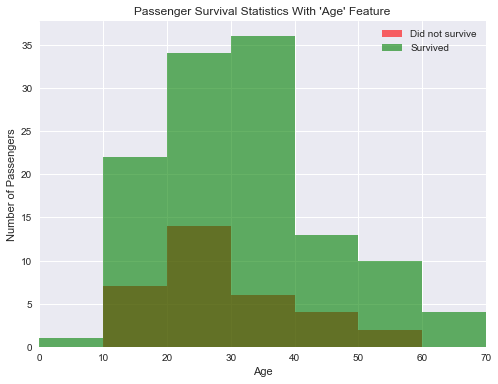

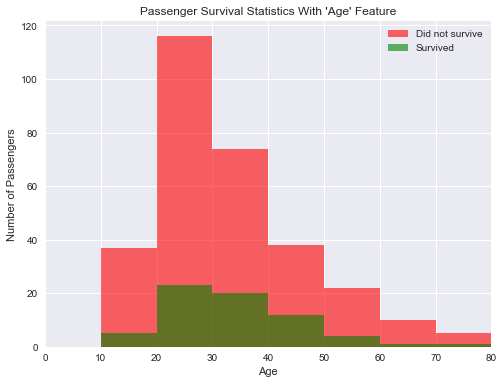

In [94]:
survival_stats(Dead, Survived, 'Age', ["Sex == 'female'","Parch == 0"])
survival_stats(Dead, Survived, 'Age', ["Sex == 'male'","Parch == 0"])

Even in case of non parents accompanying the children has high survival rate than males accompanying children.

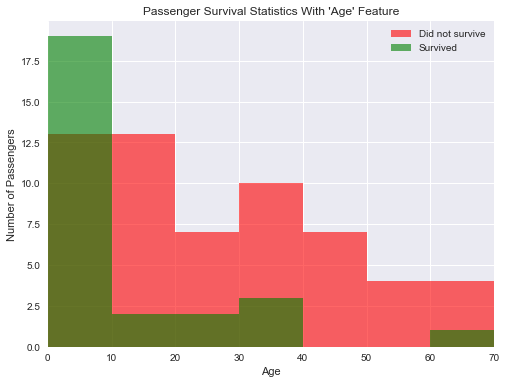

In [97]:
#male parent accompanying children
survival_stats(Dead, Survived, 'Age', ["Sex == 'male'","Parch > 0"])

Male parents accompanying children has better survival rate compared to males alone.

# Checking if class plays any crucial role

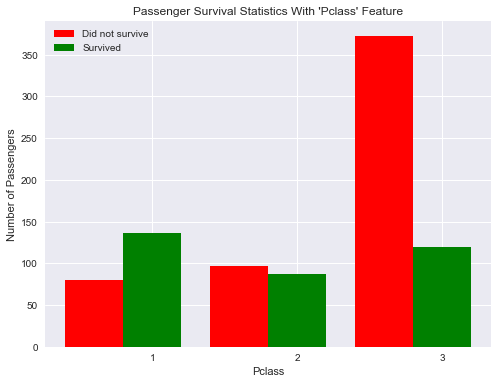

In [98]:
survival_stats(Dead,Survived,'Pclass')

we can see that people in class 1 has highest surviors than class 2 and class 3.

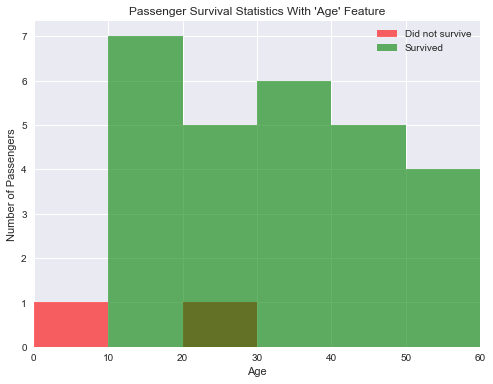

In [99]:
#checking if women with children in class 1 has highest survivors
survival_stats(Dead, Survived, 'Age', ["Sex == 'female'", "Pclass == 1", "Parch > 0"])

we can see that there are highest number of survivors in this combination. 

# Conclusion 

From my analysis children has highest survival rate followed by women with children followed by women. The priority of boarding the life boats might be as following:
1)children
2)women with children
3)women
4)men with children
5)men
we can also conclude that the people in class 1 has highest survival rate meaning the women and children of class 1 has highest survival rate compared to class 2 and class 3. so women and children of class 1 has highest chance of survival than the men in class 3 who has lowest chance of survival.

This analysis is done by assuming that children age is below 10 years. Upon varying the maximum age of children, the analysis and conclusions may vary slightly.

# References:

1)https://www.kaggle.com/c/titanic/data
2)http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot#seaborn.factorplot
3)Udacity-Intro to data analysis